In [1]:
# Start ferret
import pyferret
import numpy as np
pyferret.start(quiet=True)


True

In [2]:
# Load the data set and store as a Python variable
# Python dictionaries are a type of variable that
# stores the data along with its metadata.
(error_value, error_message) = pyferret.run('use /home/jovyan/data/1_mesh_mask.nc')
glamt_dict = pyferret.getdata('glamt',False)
gphit_dict = pyferret.getdata('gphit',False)

e1t_dict = pyferret.getdata('e1t',False)
e2t_dict = pyferret.getdata('e2t',False)

# The "keys" are the names of the entries in the
# dictionary - its pieces.
glamt_dict.keys()

dict_keys(['title', 'data', 'missing_value', 'data_unit', 'axis_types', 'axis_names', 'axis_units', 'axis_coords'])

In [3]:
# Get data directly from the dictionary object (which
# includes metadata) and squeeze out unnecessary
# index places.
glamt = np.squeeze(glamt_dict['data'])
gphit = np.squeeze(gphit_dict['data'])

e1t = np.squeeze(e1t_dict['data'])
e2t = np.squeeze(e2t_dict['data'])

# Get the sizes of the arrays.
imt,jmt = np.shape(glamt)

imt,jmt

(1784, 1719)

In [4]:
# Need to rotate the array to plot North upward
# Experiments with this suggest that it doesn't
# as I initially expected.
# Need to do more experiments.
#glamt = np.reshape(glamt,(jmt,-1), order='C')
#gphit = np.reshape(gphit,(jmt,-1), order='C')


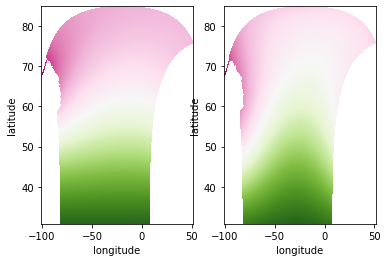

In [5]:
# Make a plot to verify that data have been loaded
# Using pcolormesh is good because it explicitly
# requires the pixel locations rather than implicit
# pixel locations with an image plotting tool.
import matplotlib.pyplot as plt
cmap = plt.get_cmap('PiYG')
# Use tuple unpacking to list the axes.
# See: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(ncols=2)
#axs[0].pcolormesh(glamt[1:imt-2,1:jmt-2],gphit[1:imt-2,1:jmt-2],glamt[1:imt-2,1:jmt-2], cmap=cmap)
#axs[1].pcolormesh(glamt[1:imt-2,1:jmt-2],gphit[1:imt-2,1:jmt-2],gphit[1:imt-2,1:jmt-2], cmap=cmap)
axs[0].pcolormesh(glamt[1:imt-2,1:jmt-2],gphit[1:imt-2,1:jmt-2],e1t[1:imt-2,1:jmt-2], cmap=cmap)
axs[1].pcolormesh(glamt[1:imt-2,1:jmt-2],gphit[1:imt-2,1:jmt-2],e2t[1:imt-2,1:jmt-2], cmap=cmap)

for ax in axs:
    ax.set(xlabel='longitude',ylabel='latitude')

plt.show()


# To do:

1. load grids
2. load grid spacings
3. load SSH
4. figure out downscaling
5. element-by-element mult spacings by area
6. find average and store


In [6]:
# Load SSH data
(error_value, error_message) = pyferret.run('use /home/jovyan/data/V20_1948_2009_SSH.nc')


In [11]:
# Now all we need to do is iterate over the time index,
# passing an new string object to ferret to get that field
# and then apply the blockmean operation on the field
# and store the output.
ssh_dict = pyferret.getdata('sossheig[d=2,l=1]',False)

In [12]:
ssh_dict.keys()

dict_keys(['title', 'data', 'missing_value', 'data_unit', 'axis_types', 'axis_names', 'axis_units', 'axis_coords'])

In [23]:
ssh = np.squeeze(ssh_dict['data'])
np.shape(ssh)

(1784, 1719)